## Fun with ~~flags~~ data generating models.

Each generating model is just a distribution $p$ for a random vector $\mathbf{x}$ (or ($\mathbf{x},y)$ if we pay a special attention to some coordinate $y$). Consider  a vector of parameters $\theta\in \Theta$ of the distrbution $p=p_\theta$. In the simplest case these parameters totally define the distribution $p$.

#### Rules of the game:

0. Predefine a stochastic model, i.e. define distribution  $p_\theta$.
1. Sample from this distribution, obtain some finite random sample $\{x_i\}_{i=1}^n$. Forget about the model for a mom.
2. Choose some estimator-function  $\hat{\theta}: \mathbb{R}^n\rightarrow \mathbb{R}$
3. Apply this function $\hat{\theta}$ to your sample and obtain some estimation (i.e. vector of numbers)  $\hat{\theta}_n$ 
4. Loop through steps 1-3 to obtain a sample estimations $\hat{\theta}_n$ and (empirically) evaluate its statistical properties. Compare them with their theoretical counterparts computed using the original model $p_\theta$!


#### Major theoretical questions for self-control:

1. Name "statistical properties" of   $\hat{\theta}_n$ you know 

        * when $n$ is fixed
        * when $n$ is increasing

2. Assume you  have 2 estimators $\hat{\theta}_n^1$ and $\hat{\theta}_n^2$ which one to choose? (its a difficult question!) be  specific!

In the next section we will continue experiments with synthetic data and learn how to choose the best model among several candidates and test hypothesys about its parameters.


### More about data generating models and synthetic data##

The topic of data generating models is fascinating! It is not restricted to linear-models we talk about (however you need something to start with). 

You can have a look at some advances in the field for images generation [here](https://www.thispersondoesnotexist.com/) and [here](https://thiscatdoesnotexist.com/) (press F5 to obtain  a new one), [Music generation](https://openai.com/blog/musenet/) and [Speech generation](https://deepmind.com/blog/article/wavenet-generative-model-raw-audio) :)

## Task 0. [Method of least squares]


<img width="200" alt="portfolio_view" src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTzUXaWgOPg63UcizAtjfl1N0l7i0QpHV6fXXjBfAVNFzl8DYdv">



We start with a simple problem  from HW1:

Find the nearest point on the hyperplane $H:$ $3x_1+4x_2+x_3=1$ (general equation of a hyperplane is  $a'x=b$) to the point $y(-1,1,1)$. 

You can do it, for instance, in 2 steps:

* first project point $y$ onto linear subspace $L=$ $\{(x_1,x_2,x_3):3x_1+4x_2+x_3=0\}$ using projector operator P.

* shift you answer back to the original hyperplane by adding $\frac{b}{|a|^2}a$. 

*Draw a schematic picture! Why do you need to add $\frac{b}{|a|^2}a$ instead of simply $b$?*

TODO:
* Calculate the projection on L and on H

* Calculate the residuals vector e of the projection on L
* Calculate norm of e and norm of projection on L, verify the Pythagorean Theorem



In [1]:
import numpy as np

np.random.seed(42)

# initial data
y  =  np.array([[-1],[1],[1]])
a = np.array([3,4,1])
b = 1
# a = np.reshape(a, [-1,1]) # if you want to store a as a column

normOfGradient = np.linalg.norm(a)

#### First, construct a projector-matrix P = X(X'X)^-1X' 
# define X:
# start with projector matrix P
# take any 2 noncolinear vector-columns from L
v1 = np.array([[1],[1],[-7]]) # TODO: fill "?" with  numbers!
v2 = np.array([[0], [1],[-4]])

try:
    np.testing.assert_array_almost_equal(np.dot(a,v1), 0)
    np.testing.assert_array_almost_equal(np.dot(a,v2), 0)
except:
    print("Ups! your vectors do not belong to L!!!!")

# concatenate them into 3x2 matrix
X = np.concatenate([v1,v2], axis=1)

# Q =  (X'X)

Q = X.T @ X

Qinv = np.linalg.inv(Q) # TODO: Qinv = Q^-1, see np.linalg.inv

# Use P= XQ^-1X' 
P =  X @ Qinv @ X.T

# check that P^2 = P and P=P'

# TODO: check: P^2 = P, P'= P
np.testing.assert_array_almost_equal(P @ P, P)
np.testing.assert_array_almost_equal(P.T, P)

##### Next, project on L:

projOnL = P @ y

##### After that, project on H:
projOnH  = P @ y + np.reshape(a,[-1,1])*b/normOfGradient**2

# check that projOnL is really in L
np.testing.assert_array_almost_equal(np.dot(a,projOnL), 0)

# check that projOnH is really in H
np.testing.assert_array_almost_equal(np.dot(a.T,projOnH), b)

# calculate the residuals:
e = y - projOnL # TODO

# norm(y)**2  =  norm(e)**2 + norm(proj)**2  
precize_ans = np.array([[-29/26],[22/26],[25/26]])
print("||ans - numerical_ans|| = ",np.linalg.norm(projOnH - precize_ans))

# TODO: check |y|^2 = |e|^2 + |projOnL|^2
np.testing.assert_array_almost_equal(np.linalg.norm(y) ** 2, np.linalg.norm(e) ** 2 + np.linalg.norm(projOnL) ** 2)

||ans - numerical_ans|| =  2.4924445086331347e-15


##### Task 1 [Idea of the method of  moments, see also Task 1 from HW 5.]##


Let generating model be a 1-dimensional Uniform distribution on [a,b] interval.
You need to

1)  draw n-element sample from Unif[a,b] distribution.  

2)  assume you've forgotten your parameters (a and b), but you still remember that you sampled from some uniform distribution. So you want to "restore" $a$ and $b$ from your sample. 

3) A most common (but not the only) way to do this is to use the "method of moments":  Compute theoretically some moments for a  uniform distribution (you can find first and second moments, for instance). If you do this way, denote them by $\mu_1, \mu_2$. Solve equations and express $a$ and $b$ as functions  of $\mu_1$, $\mu_2.$

4) Using your sample find $\hat{\mu_1}$ and $\hat{\mu_2}$ and your estimates $\hat{a}=a(\hat{\mu_1}, \hat{\mu_2}$), $\hat{b}=b(\hat{\mu_1},\hat{\mu_2})$ using expressions from 3.

5) increase your sample size 10 times and repeat steps 1-4

What happens with $\hat{a}_n, \hat{b}_n$ as sample size $n$ increases? Why?

In [2]:
a = 5 
b = 15

n = 20 # your sample size

def generator(a, b, n):

    sample = np.random.uniform(low=a, high=b,size = [n])

    ##TODO: 2)-4) and 5)

    #2-4.
    def get_a_b(n1, n2):
        a = n1 - np.sqrt(3 * n2)
        b = n1 + np.sqrt(3 * n2)
        return (a, b)

    n1, n2 = np.mean(sample), np.var(sample)

    a_new, b_new = get_a_b(n1, n2)

    print('N: ', n, ', Moments:', a_new, b_new, ', Sq. Errors: ', round((a - a_new)**2, 4), round((b - b_new) ** 2, 4))

#5

for _ in range(5):
    n *= 10
    generator(a, b, n)

N:  200 , Moments: 4.745178092592499 14.934946572739822 , Sq. Errors:  0.0649 0.0042
N:  2000 , Moments: 4.972518347363026 15.058804902143875 , Sq. Errors:  0.0008 0.0035
N:  20000 , Moments: 5.008961312675615 14.998205455597294 , Sq. Errors:  0.0001 0.0
N:  200000 , Moments: 5.002718870743355 15.002160922933822 , Sq. Errors:  0.0 0.0
N:  2000000 , Moments: 5.000537613798826 14.996806064229144 , Sq. Errors:  0.0 0.0


## Task 2 [A simple linear model with nonorthogonal regressors]

Consider a linear model (aka data generating process) $y = a x_1 +bx_2 +c+e$, where *regressors* $x_1$ and $x_2$ are some random variables  and *error* e is another variable assumed to be conditionally independent of  $x_1,x_2$ (i.e. $\mathbf{E}(e|x_1,x_2) = 0$ and thus it is cond. independent of the regressors). The vector of parameters $\theta$ we consider now is the vector $(a,b,c)$, but, in principle, it can include other things like moments of $e$ or $y$, etc. This model is usually called **long** or **unrestricted**. *What is the interpretation of the coefficient $a$ in this setting?*

In contrast to the long model we consider another model  $y = a x_1  +c+e$ which is  called **short** or **restricted**. Usually people try to estimate short model when they need to estimate $a$ but have no access to the regressor $x_2$ (they might be lazy to collect this data or this data is unavailable or unobservableor they don't know the actual form of the long model, no matter!). 

You need to 

1) generate samples from the **long** model

2) Use the least squares to estimate its parameters in the long model as in **task 0**

3) Next, use the **short** model to try to estimate coefficients $a$ and $c$. **Main question:** Do they converge (as sample-size increases) to the coefficients of the  **long** model?  

4) Try to increase sample-size $n$ to 2000, to 10000




**Questions (write your answers in the next cell of the notebook):
Do short model estimates look consistent with the long model? Explain why/why not? Try to set parameter $\rho$ in the data generation model to 0. What happens? Why? Can you generate samples in a loop and find empirical distribution of your estimates $\hat{a}_n$ and $\hat{c}_n$. (Plot histogram, when n is large.) What shape does it have?**


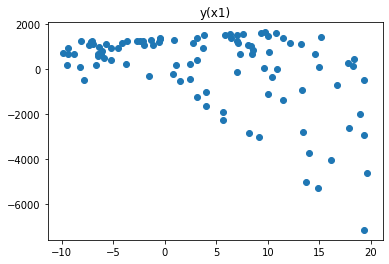

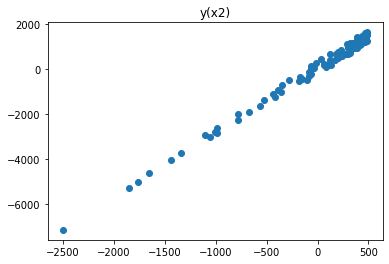

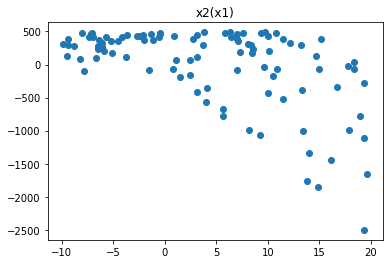

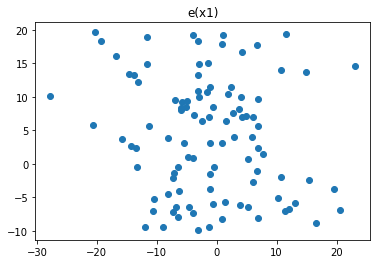

a_hat_long_model = 19.77
c_hat_long_model = -30.35

a_hat_short_model = -95.92
c_hat_short_model = 453.65


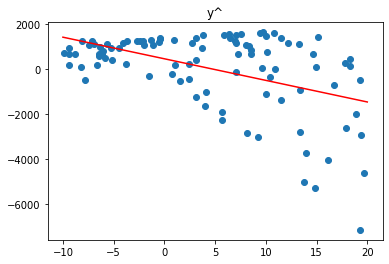

N =  2000

a_hat_long_model = 19.96
c_hat_long_model = -29.81

a_hat_short_model = -100.62
c_hat_short_model = 595.00

N =  10000

a_hat_long_model = 20.00
c_hat_long_model = -30.01

a_hat_short_model = -100.36
c_hat_short_model = 552.42



In [111]:
import matplotlib.pyplot as plt
import numpy as np
np.random.RandomState(seed=0)
np.random.seed(0)

a = 20
b = 3
с = -30
n_smpl = 100


def generate_data(n = n_smpl, rho = 10):
    x1 = np.random.uniform(-10, 20, n)
    x2 =  np.random.uniform(-10, 20, n) - rho * (np.random.uniform(-10, 20, n) + x1) ** 2 # oh my god! some super complicated formula, Don' t look at it! 
    x2 = x2 - np.mean(x2) # demean x2 (try to switch this off, what would happen with c_hat_short?)
    e = np.random.normal(0, 10, n)
    
    
    y = a * x1 + b * x2 + с + e
    
    y = np.reshape(y,[-1,1]) # we want data to be stored as vector-columns
    x1 = np.reshape(x1,[-1,1])
    x2 = np.reshape(x2,[-1,1])
    e = np.reshape(e,[-1,1])
    return y, x1, x2, e

[y, x1, x2, e] = generate_data(rho = 2)

## Plotting sample!

# plot y vs x1
plt.scatter(x1.transpose()[0],y.transpose()[0])
plt.title('y(x1)')
plt.show();

# try to plot other things:
# # plot y vs x2

plt.scatter(x2.transpose()[0],y.transpose()[0])
plt.title('y(x2)')
plt.show();

# # plot x1 vs x2

plt.scatter(x1.transpose()[0],x2.transpose()[0])
plt.title('x2(x1)')
plt.show();


# plot e vs x1 or x2

plt.scatter(e.transpose()[0], x1.transpose()[0])
plt.title('e(x1)')
plt.show();


# Estimate long model
def long_coef(x1, x2, y):
    
    X = np.concatenate([x1, x2, np.ones_like(x1)], axis=1)
    
    beta_hat_long = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return beta_hat_long[0][0], beta_hat_long[1][0], beta_hat_long[2][0], beta_hat_long

a_long, b_long, с_long, beta_long = long_coef(x1, x2, y)

print("a_hat_long_model = %.2f" % a_long)
print("c_hat_long_model = %.2f" % с_long, end='\n\n')

# Estimate short model

def short_coef(x1, x2, y):

    consts = np.ones_like(x1)

    X_short = np.concatenate([consts, x1], axis=1)

    Q = np.dot(X_short.transpose(), X_short)
    Qinv = np.linalg.inv(Q)
    beta_hat_short = np.linalg.multi_dot([ Qinv, X_short.transpose(), y])

    a_hat_short = beta_hat_short[1][0]
    c_hat_short = beta_hat_short[0][0]
    
    return a_hat_short, c_hat_short

a_hat_short, c_hat_short = short_coef(x1, x2, y)

print("a_hat_short_model = %.2f" % a_hat_short)
print("c_hat_short_model = %.2f" % c_hat_short)

# plotting forecast:
grid = np.linspace(-10,20, 20)
consts  = np.ones_like(grid)
y_hat = c_hat_short * consts + a_hat_short * grid

plt.scatter(x1.transpose()[0],y.transpose()[0])
plt.plot(grid, y_hat, 'r')
plt.title('y^')
plt.show() 


#Round 2

n_smpl = 2000

[y, x1, x2, e] = generate_data(n=n_smpl, rho=2)

a_long, b_long, с_long, beta_long = long_coef(x1, x2, y)

print('N = ', n_smpl, end='\n' * 2)

print("a_hat_long_model = %.2f" % a_long)
print("c_hat_long_model = %.2f" % с_long, end='\n' * 2)

a_hat_short, c_hat_short = short_coef(x1, x2, y)

print("a_hat_short_model = %.2f" % a_hat_short)
print("c_hat_short_model = %.2f" % c_hat_short, end='\n' * 2)

#Round 3

n_smpl = 10000

[y, x1, x2, e] = generate_data(n=n_smpl, rho=2)

a_long, b_long, с_long, beta_long = long_coef(x1, x2, y)

print('N = ', n_smpl, end='\n' * 2)

print("a_hat_long_model = %.2f" % a_long)
print("c_hat_long_model = %.2f" % с_long, end='\n' * 2)

a_hat_short, c_hat_short = short_coef(x1, x2, y)

print("a_hat_short_model = %.2f" % a_hat_short)
print("c_hat_short_model = %.2f" % c_hat_short, end='\n' * 2)

#y - np.concatenate([x1, x2, np.ones_like(x1)], axis=1) @ beta_long

In [112]:
np.corrcoef(x1.reshape(-1), x2.reshape(-1))[0,1]

-0.5785869429481852

In [113]:
display(np.corrcoef(x2.reshape(-1), np.ones_like(x1.reshape(-1))))
display(np.cov(x2.reshape(-1), np.ones_like(x1.reshape(-1))))

array([[ 1., nan],
       [nan, nan]])

array([[367636.07988006,      0.        ],
       [     0.        ,      0.        ]])

Answer: no, coefficients don't converge as even with n increasing we still in the second model project y to the subspace of X, where X = [x1, x2, 1], so we will always lose more information regardless of n size. Also, the key is in the dependency between x1&const and x2. One can state that x2=f(x1, c) if pho!=0. Dependency on constant comes from demeaning. So dependency of y on x1 is more than externalized in a_long coefficient (and which is shown in a_short) as well as dependency on constant is fully represented in c_long.

In [114]:
#Round 4
for i in [100, 2000, 10000]:
    n_smpl = i

    [y, x1, x2, e] = generate_data(n=n_smpl, rho=0)

    a_long, b_long, с_long, beta_long = long_coef(x1, x2, y)

    print('N = ', n_smpl, end='\n' * 2)

    print("a_hat_long_model = %.2f" % a_long)
    print("c_hat_long_model = %.2f" % с_long, end='\n' * 2)

    a_hat_short, c_hat_short = short_coef(x1, x2, y)

    print("a_hat_short_model = %.2f" % a_hat_short)
    print("c_hat_short_model = %.2f" % c_hat_short, end='\n' * 2)

N =  100

a_hat_long_model = 20.06
c_hat_long_model = -29.60

a_hat_short_model = 20.67
c_hat_short_model = -32.52

N =  2000

a_hat_long_model = 20.01
c_hat_long_model = -30.18

a_hat_short_model = 20.13
c_hat_short_model = -30.75

N =  10000

a_hat_long_model = 20.01
c_hat_long_model = -29.96

a_hat_short_model = 19.97
c_hat_short_model = -29.78



Answer: wow, coeffs started to converge. Very strange. But we lost dependency of x2 on x1. As a, b, с are coefficients of projections of y on x1, x2 and 1 (the numbers we need subspace creating vectors to multiply on to get the projections), the results of projection on x1 is indifferent if all regarded subspaces are independent of each other. With increasing n the enthropy loss from excluding one regressor is about to decrease, so we can get more precise result. Or maybe beyond infinity x1 and x2 are distributed like underlying random variables, which have fixed correlation. In case of random samples correlation is not stricted to one value, but as sample approaching variable it's converging. And correlation means dependence in some kind, which makes a_long and c_long inferior as they don't fully describe dependence y on x1 and constant. What's more, c_short is  converging to c_long though turned on demeaning should still represent correlation between x2 and constant. Okey, I got it. Any vector is a sum of a projection on constant + orthogonal leftover. The projection on constant is mean, so extracting mean from x2 we take the dependency on constant from it. That's why they are uncorrelated. If we swtich if off, we will see that c_short doesn't converge to c_long. Very illogical but here it is. Another option is that a_long converges to a_short because they both converge to "a", so their subtraction moves to zero on infinity.

In [109]:
np.corrcoef(x1.reshape(-1), x2.reshape(-1))[0,1]

-0.011897358447996364

In [110]:
display(np.corrcoef(x2.reshape(-1), np.ones_like(x1.reshape(-1))))
display(np.cov(x2.reshape(-1), np.ones_like(x1.reshape(-1))))

array([[ 1., nan],
       [nan, nan]])

array([[75.51047475,  0.        ],
       [ 0.        ,  0.        ]])

Here I have to proof that betas are a consistent estimator of original betas. But it's not as easy and hard to implement in notebook using tex. So, I will provide the solution further after preliminary deliberation of a few questions personally. But I will show the fact empirically.

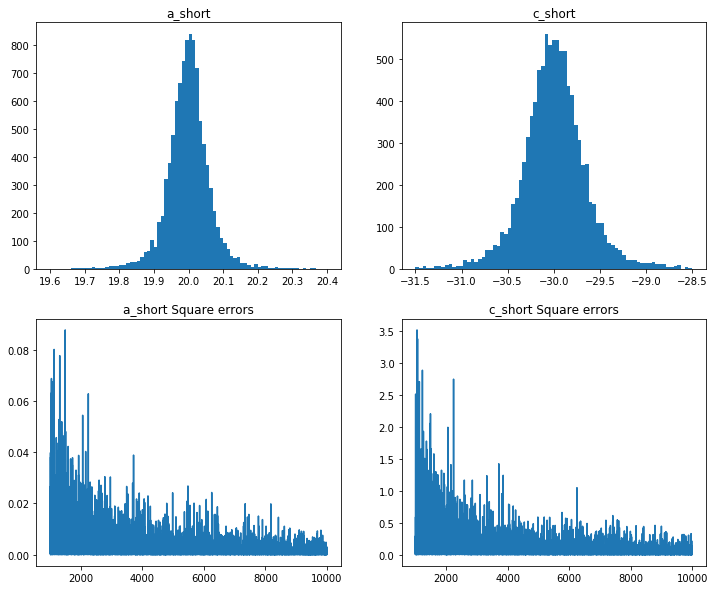

In [62]:
a_s, c_s = [], []
for i in range(1, 10000):
    
    n_smpl = i

    [y, x1, x2, e] = generate_data(n=n_smpl, rho=0)

    a_hat_short, c_hat_short = short_coef(x1, x2, y)
    
    a_s.append(a_hat_short)
    c_s.append(c_hat_short)

plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(a_s, bins=80, range=(a - .4, a + .4))
plt.title('a_short')

plt.subplot(222)
plt.hist(c_s, bins=75, range=(с - 1.5, с + 1.5))
plt.title('c_short')

plt.subplot(223)
plt.plot(range(1001, 10000), (np.array(a_s)[1000:] - a) ** 2)
plt.title('a_short Square errors')
plt.subplot(224)
plt.plot(range(1001, 10000), (np.array(c_s)[1000:] - с) ** 2)
plt.title('c_short Square errors')
plt.show();

Answer: wow, it's a normal distribution with mean = a (and c). And we see that the error has a trend to diminish with number of sample plummeting.